In [90]:
from scipy.io import loadmat
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score #get score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict #get model
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [72]:
def displayImage(x):
    plt.imshow(x.reshape(28,28),
               cmap=plt.cm.binary,
               interpolation="nearest"
               )
    plt.show()

In [73]:
def displayPredict(clf, actually_y, x):
    print("Actually = ", actually_y)
    print("Prediction = ", clf.predict([x])[0])

In [74]:
path = kagglehub.dataset_download("avnishnish/mnist-original")
mnist_raw = loadmat(f"{path}/mnist-original.mat")

print(mnist_raw.keys())
print(mnist_raw["data"])
print(mnist_raw["label"])
print(mnist_raw["data"].shape)

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 9. 9. 9.]]
(784, 70000)


In [75]:
mnist = {
    "data" : mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}
print(mnist["data"])
print(mnist["data"].shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)


In [76]:
x,y = mnist["data"], mnist["target"]

#training & test
#X_train, x_test, Y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.15)
X_train, x_test, Y_train, y_test = x[:60000], x[60000:],y[:60000], y[60000:]
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [77]:
predict_number = 500
Y_train_0 = (Y_train == 0) # 0 is true, 1,2,3..9 is false
y_test_0 = (y_test == 0) # 0 is true, 1,2,3..9 is false

print(Y_train_0)
print(y_test_0) 

[ True  True  True ... False False False]
[ True  True  True ... False False False]


In [78]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,Y_train_0)

SGDClassifier()

In [79]:
y_test_pred = sgd_clf.predict(x_test)
print(classification_report(y_test_0,y_test_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99      9020
        True       0.94      0.97      0.95       980

    accuracy                           0.99     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.99      0.99      0.99     10000



In [88]:
score = cross_val_score(sgd_clf,x_test,y_test_0,cv=3, scoring="accuracy")
print("score : ", score)

score :  [0.97180564 0.9639964  0.96579658]


Actually =  True
Prediction =  True


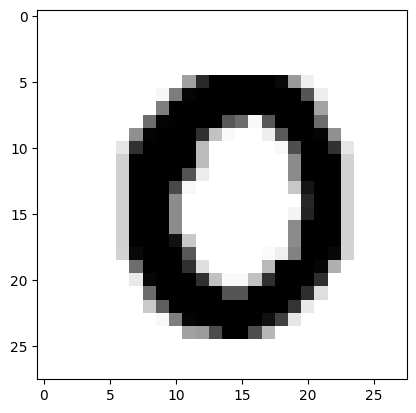

In [81]:
displayPredict(sgd_clf,y_test_0[predict_number],x_test[predict_number])
displayImage(x_test[predict_number])

In [97]:
y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_0, cv=3)
cm=confusion_matrix(Y_train_0,y_train_pred)

In [93]:
print(cm)

[[52739  1338]
 [  219  5704]]


In [94]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 0"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

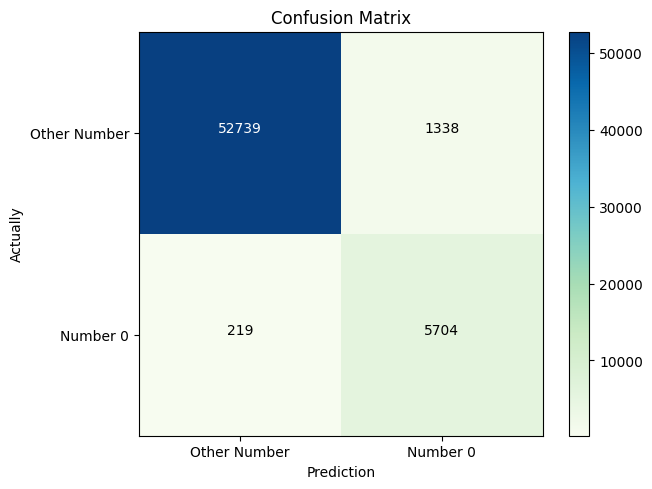

In [95]:
plt.figure()
displayConfusionMatrix(cm)

In [96]:
classes = ["Other number","Number 0"]
y_test_pred = sgd_clf.predict(x_test)
print(classification_report(y_test_0,y_test_pred,target_names=classes))
print("Accuracy Score",accuracy_score(y_test_0,y_test_pred)*100)

              precision    recall  f1-score   support

Other number       1.00      0.99      0.99      9020
    Number 0       0.94      0.97      0.95       980

    accuracy                           0.99     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy Score 99.09
